<a href="https://colab.research.google.com/github/mikendonga/Computer-vision-using-CNN-for-cifar10/blob/main/CIFAR10_CNN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🧠 CIFAR-10 Image Classification using CNN
![Convolutional Neural Network](https://www.ionos.com/digitalguide/fileadmin/_processed_/b/e/csm_schaubild-convolutional-neural-network_4693b77e0c.webp)


In this notebook, we will build a **Convolutional Neural Network (CNN)** using **TensorFlow** and **Keras** to classify images from the **CIFAR-10 dataset**.



## Step 1: Import Libraries


In [ ]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt



## Step 2: Load and Prepare the CIFAR-10 Dataset


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


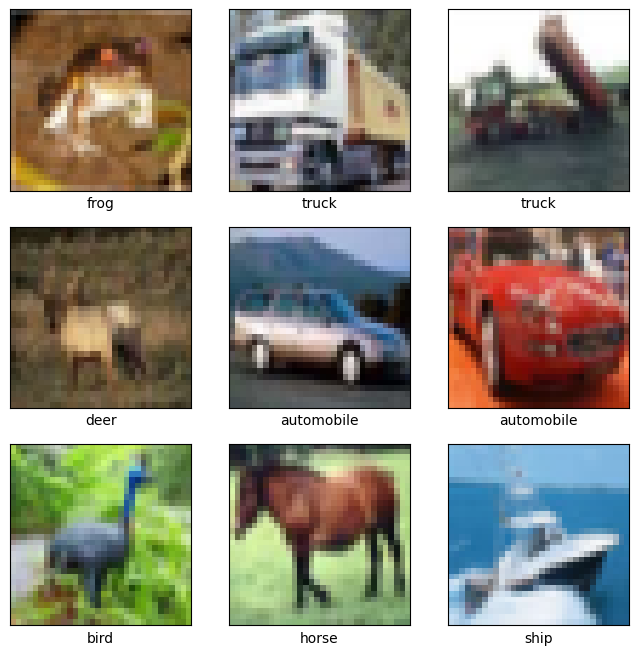

In [ ]:

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Display some sample images
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([]); plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()



## Step 3: Build the CNN Model


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu')
])

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)


## Step 4: Compile and Train the Model


In [ ]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 48ms/step - accuracy: 0.3429 - loss: 1.7687 - val_accuracy: 0.5457 - val_loss: 1.2581
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - accuracy: 0.5741 - loss: 1.2059 - val_accuracy: 0.6181 - val_loss: 1.0765
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 46ms/step - accuracy: 0.6423 - loss: 1.0163 - val_accuracy: 0.6484 - val_loss: 1.0082
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.6657 - loss: 0.9439 - val_accuracy: 0.6691 - val_loss: 0.9601
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 47ms/step - accuracy: 0.6979 - loss: 0.8649 - val_accuracy: 0.6847 - val_loss: 0.9139
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.7158 - loss: 0.8063 - val_accuracy: 0.6649 - val_loss: 0.9849
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.7376 - loss: 0.7538 - val_accuracy: 0.6889 - val_loss: 0.9073
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.7510 -


## Step 5: Evaluate Model Performance


313/313 - 5s - 16ms/step - accuracy: 0.7032 - loss: 0.8904

✅ Test accuracy: 0.70


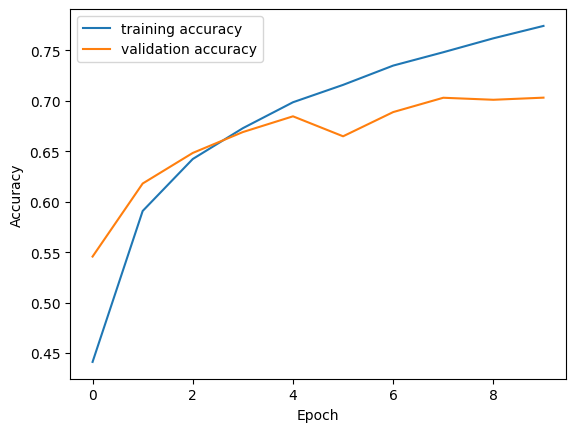

In [ ]:

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\n✅ Test accuracy: {test_acc:.2f}')

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



## Step 6: Predict New Images
Upload any image from your computer to see how the trained CNN classifies it.


In [ ]:

import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Softmax
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def predict_new_image(model, img_path):
    """
    Predicts the class of a single image using a trained CNN model.

    Parameters:
        model: Trained TensorFlow/Keras CNN model
        img_path: Path to the image file (e.g. 'images/test_cat.jpg')
    """
    try:
        # Load and preprocess the image
        img = Image.open(img_path).resize((32, 32))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict the class
        prob_model = Sequential([model, Softmax()])
        prediction = prob_model.predict(img_array)
        predicted_class = np.argmax(prediction[0])
        confidence = np.max(prediction[0])

        # Display results
        print("\n🖼️ Image Path:", img_path)
        print("🔍 Predicted Class:", class_names[predicted_class])
        print(f"✅ Confidence: {confidence*100:.2f}%")

        plt.imshow(img)
        plt.title(f"Prediction: {class_names[predicted_class]} ({confidence*100:.2f}%)")
        plt.axis('off')
        plt.show()

    except Exception as e:
        print("❌ Error:", e)

# Example usage:
# predict_new_image(model, "sample_images/cat.jpg")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step

🖼️ Image Path: /content/truck1.jpg
🔍 Predicted Class: truck
✅ Confidence: 68.06%


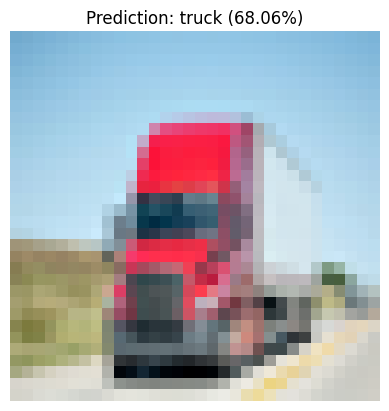

In [ ]:
predict_new_image(model, "/content/truck1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step

🖼️ Image Path: /content/dog1.jpeg
🔍 Predicted Class: deer
✅ Confidence: 95.23%


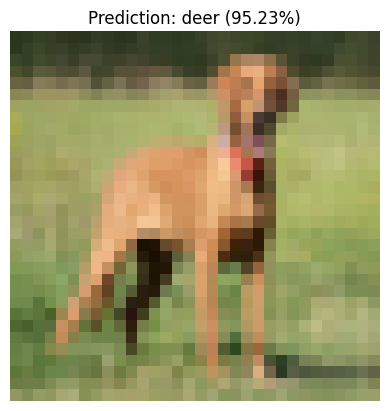

In [ ]:
predict_new_image(model, "/content/dog1.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step

🖼️ Image Path: /content/horse1.jpg
🔍 Predicted Class: horse
✅ Confidence: 93.01%


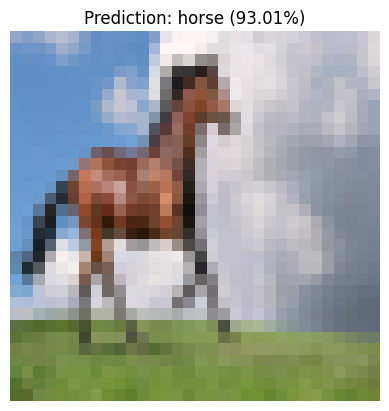

In [ ]:
predict_new_image(model, "/content/horse1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step

🖼️ Image Path: /content/plane1.jpg
🔍 Predicted Class: airplane
✅ Confidence: 99.93%


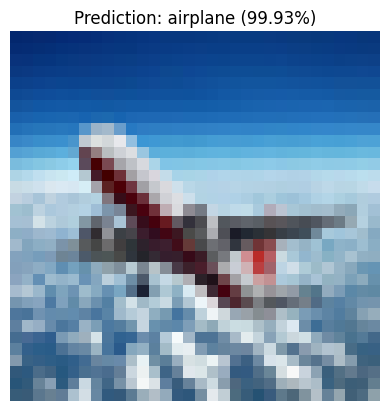

In [ ]:
predict_new_image(model, "/content/plane1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step

🖼️ Image Path: /content/car1.jpg
🔍 Predicted Class: automobile
✅ Confidence: 99.61%


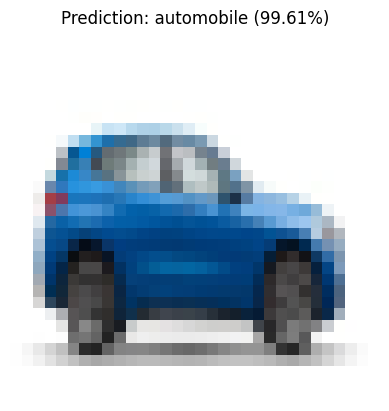

In [ ]:
predict_new_image(model, "/content/car1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step

🖼️ Image Path: /content/frog1.jpeg
🔍 Predicted Class: frog
✅ Confidence: 64.09%


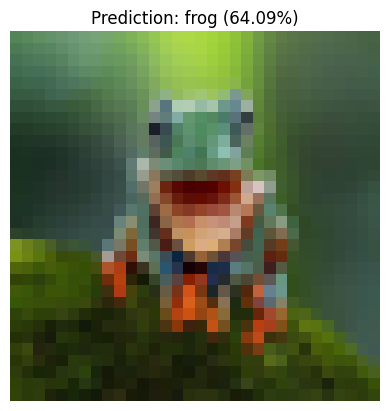

In [ ]:
predict_new_image(model, "/content/frog1.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step

🖼️ Image Path: /content/bird1.jpeg
🔍 Predicted Class: bird
✅ Confidence: 99.13%


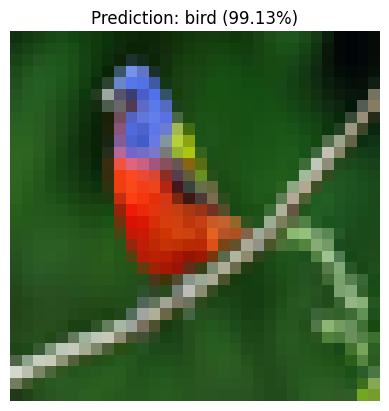

In [ ]:
predict_new_image(model, "/content/bird1.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step

🖼️ Image Path: /content/person1.jpeg
🔍 Predicted Class: horse
✅ Confidence: 73.06%


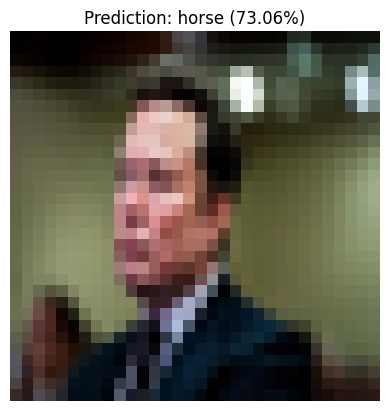

In [ ]:
predict_new_image(model, "/content/person1.jpeg")
